In [2]:
import pandas as pd
df = pd.read_html('DailyWiseMarketArrivals.html')[-1]
df = df.dropna()
df.rename(columns = {"Date":"ds" , "Modal Price (Rs/q)" : "y"},inplace = True)
df_new  = df[["ds","y"]]
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



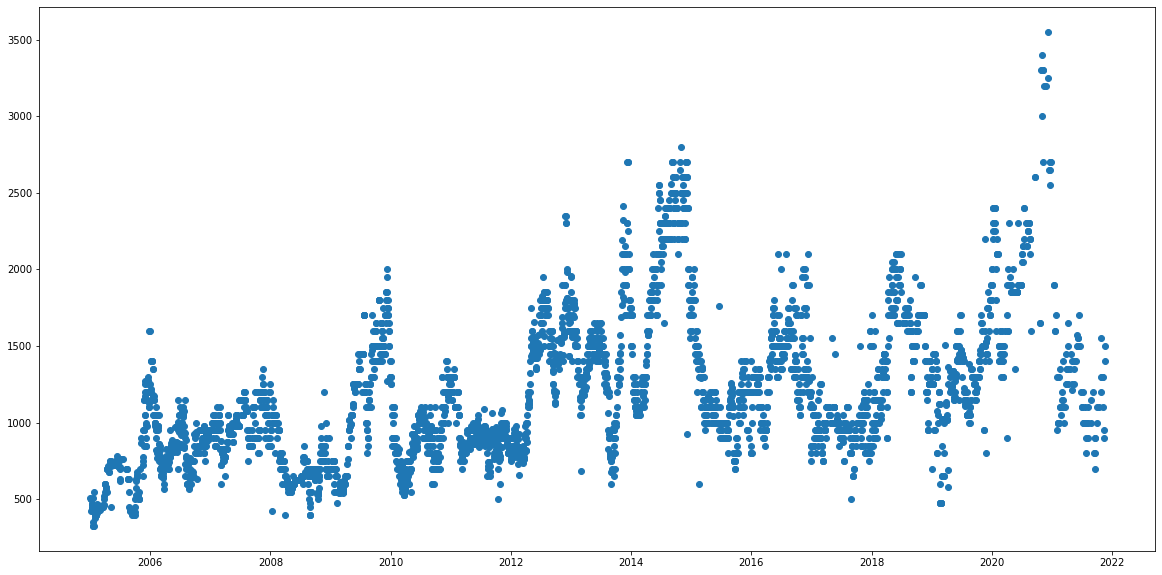

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(df_new['ds'], df_new['y'])

In [4]:
import numpy as np
df_new['y'] = np.where(df_new['y'] > 2750 , np.nan , df_new['y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
import fbprophet
op = fbprophet.Prophet()
op.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
forecast = op.make_future_dataframe(periods= 365 , freq = 'D')
forecast = op.predict(forecast)

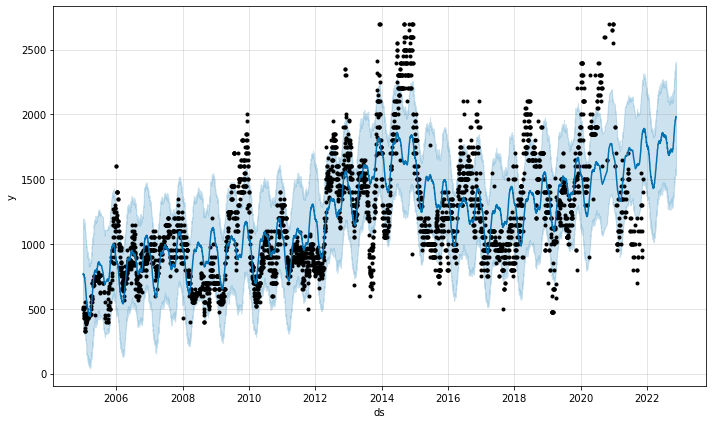

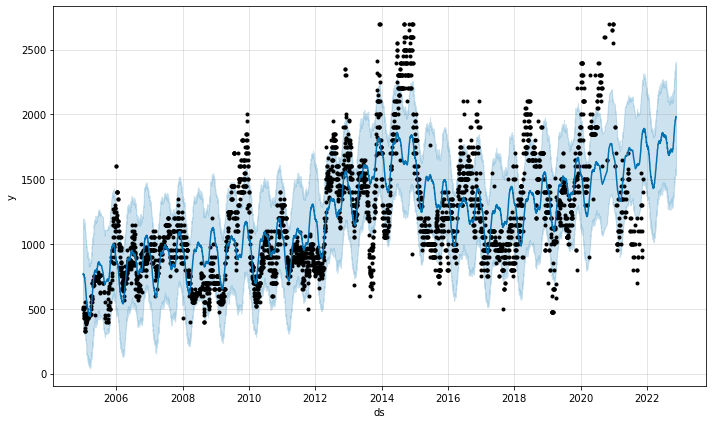

In [11]:
op.plot(forecast)

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(df)

               ds     Market  ...  Price Maximum (Rs/q)     y
0     01/Jan/2005  BANGALORE  ...                   580   510
1     03/Jan/2005  BANGALORE  ...                   560   500
2     05/Jan/2005  BANGALORE  ...                   560   500
3     06/Jan/2005  BANGALORE  ...                   550   500
4     07/Jan/2005  BANGALORE  ...                   460   425
...           ...        ...  ...                   ...   ...
4146  08/Nov/2021  BANGALORE  ...                  1200  1100
4147  11/Nov/2021  BANGALORE  ...                  1000   950
4148  12/Nov/2021  BANGALORE  ...                  1000   900
4149  16/Nov/2021  BANGALORE  ...                  1600  1400
4150  17/Nov/2021  BANGALORE  ...                  1600  1500

[4151 rows x 6 columns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4151 non-null   object
 1   Market                4151 non-null   object
 2   Arrival(q)            4151 non-null   int64 
 3   Price Minimum (Rs/q)  4151 non-null   object
 4   Price Maximum (Rs/q)  4151 non-null   object
 5   y                     4151 non-null   object
dtypes: int64(1), object(5)
memory usage: 227.0+ KB


In [9]:
df.isnull().sum()

ds                      0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
y                       0
dtype: int64